In [1]:
# command for downloading the dataset
# curl.exe --output AB_NYC_2019.csv --url https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import sklearn as sk

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt

In [97]:
data_path = Path("Data/AB_NYC_2019.csv")
full_data_path = Path.cwd().parents[1].joinpath(data_path)
df = pd.read_csv(full_data_path)

In [3]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [98]:
# only use target columns
cols = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count','availability_365', 'price']
df = df[cols]

In [99]:
base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count','availability_365']

<AxesSubplot:xlabel='price', ylabel='Count'>

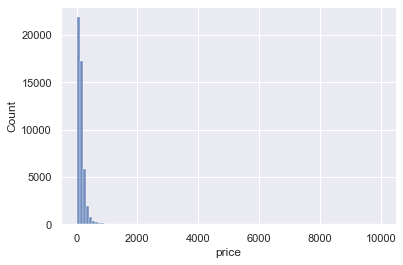

In [5]:
sns.histplot(df.price, bins=100)

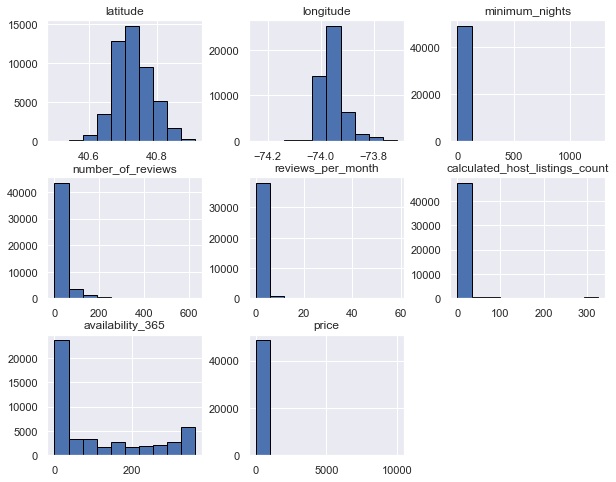

In [6]:
df.hist(edgecolor= 'black',figsize=(10,8))
plt.show()

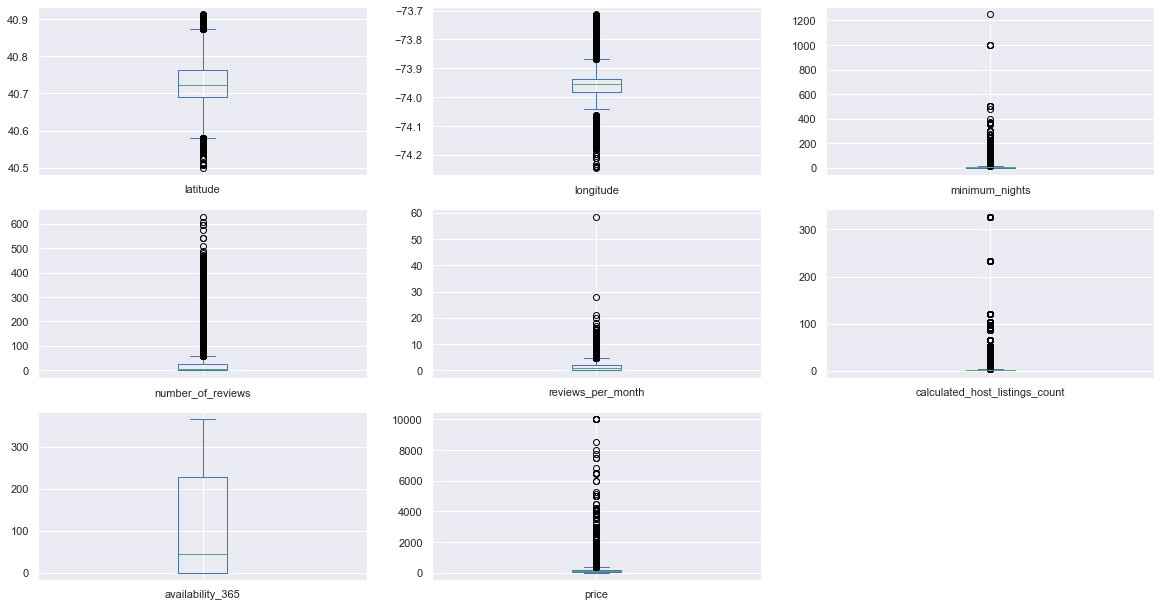

In [7]:
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

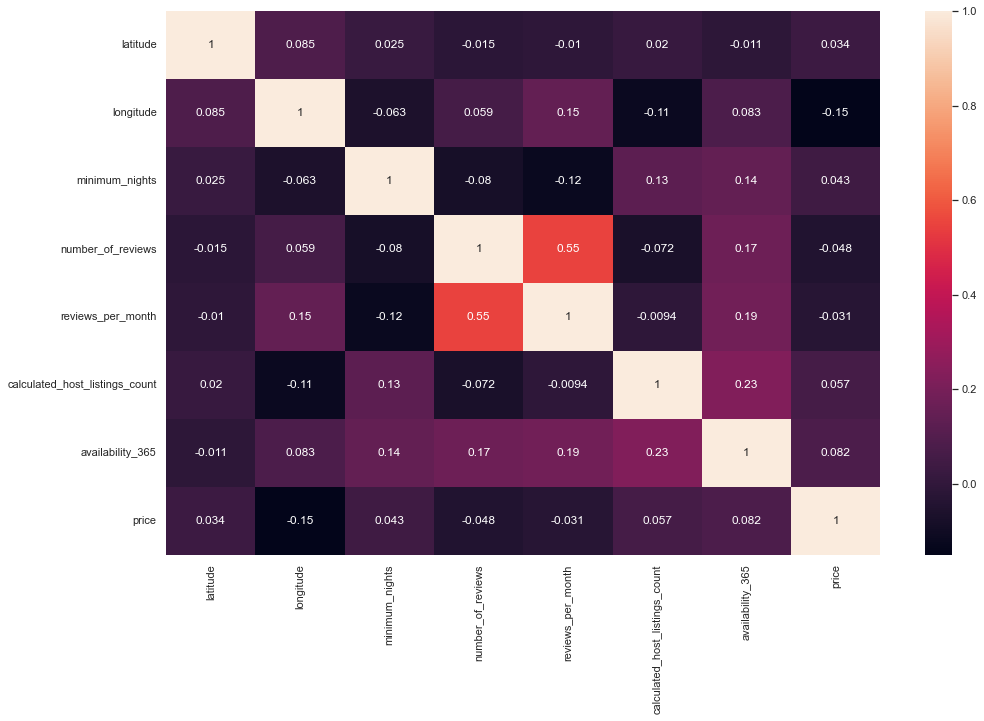

In [8]:
plt.figure(figsize =(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Question 1
Find a feature with missing values. How many missing values does it have?

In [9]:
df.isna().sum()

latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [10]:
print(df.shape)

(48895, 8)


In [11]:
print(df.dtypes)

latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object


In [12]:
print(df.describe())

           latitude     longitude  minimum_nights  number_of_reviews  \
count  48895.000000  48895.000000    48895.000000       48895.000000   
mean      40.728949    -73.952170        7.029962          23.274466   
std        0.054530      0.046157       20.510550          44.550582   
min       40.499790    -74.244420        1.000000           0.000000   
25%       40.690100    -73.983070        1.000000           1.000000   
50%       40.723070    -73.955680        3.000000           5.000000   
75%       40.763115    -73.936275        5.000000          24.000000   
max       40.913060    -73.712990     1250.000000         629.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       38843.000000                    48895.000000      48895.000000   
mean            1.373221                        7.143982        112.781327   
std             1.680442                       32.952519        131.622289   
min             0.010000               

### Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [13]:
df.minimum_nights.median()

3.0

- Split the data
- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('price') is not in your dataframe.
- Apply the log transformation to the price variable using the np.log1p() function.### 

In [14]:
print(df.columns)
print(len(df.columns))

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price'],
      dtype='object')
8


In [15]:
len(df)

48895

In [16]:
seed = 42
test_size = int(0.20 * len(df))
validiation_size = int(0.20 * len(df))
train_size = int(.6 * len(df))

In [17]:
print(test_size, validiation_size, train_size)

9779 9779 29337


In [18]:
# shuffle data and reset index
df_shuffle = df.sample(frac = 1, random_state = seed)
df_shuffle.reset_index(drop=True, inplace=True)
df_shuffle.head(3)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,40.64354,-73.97777,3,62,0.71,1,189,89
1,40.70666,-73.90779,21,0,NaN,1,73,30
2,40.76116,-73.99016,2,17,0.43,1,0,120


In [19]:
# transform price to log
df_shuffle['price'] = np.log1p(df_shuffle['price'])

In [20]:
# split dataset
df_train_x, df_val_x, df_test_x = np.split(df_shuffle, [train_size, train_size+validiation_size])

In [21]:
# proof of lengths matching
print("train length:\t\t", len(df_train_x))
print("validation length:\t", len(df_val_x))
print("test length:\t\t", len(df_test_x))
print()
print("sum length:\t\t", len(df_train_x)+len(df_val_x)+len(df_test_x))
print("original length:\t", len(df_shuffle))

train length:		 29337
validation length:	 9779
test length:		 9779

sum length:		 48895
original length:	 48895


In [22]:
# build y target columns
df_train_y = df_train_x['price']
df_train_x.drop(['price'], axis=1, inplace=True)

df_val_y = df_val_x['price']
df_val_x.drop(['price'], axis=1, inplace=True)

df_test_y = df_test_x['price']
df_test_x.drop(['price'], axis=1, inplace=True)

In [85]:
# array = df_shuffle.values

In [84]:
# log_price = np.log1p(array[:,7])

In [78]:
# X = array[:, 0:7]
# Y = log_price

In [83]:
# X_train = X[:train_size]
# X_validation = X[train_size:train_size + valdiation_size]
# X_test = X[train_size + valdiation_size:]

# Y_train = Y[:train_size]
# Y_validation = Y[train_size:train_size + valdiation_size]
# Y_test = Y[train_size + valdiation_size:]

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state=seed)

### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
- For computing the mean, use the training only!
- Compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [23]:
# calculate mean of reviews_per_month
rpm_mean = df_train_x.reviews_per_month.mean()

# make copies of df_train_x
df_train_x_na_zero = df_train_x.copy()
df_train_x_na_mean = df_train_x.copy()

In [24]:
# fill reviews_per_month column with 0
df_train_x_na_zero.reviews_per_month.fillna(0, inplace=True)

In [25]:
# fill reviews_per_month column with mean
df_train_x_na_mean.reviews_per_month.fillna(rpm_mean, inplace=True)

In [26]:
# make linear regression model
model = LinearRegression()
model.fit(df_train_x_na_zero, df_train_y)

print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: -419.9126589235938
Coefficients: [ 1.30676225e+00 -5.02167855e+00 -5.59803110e-04 -4.07634897e-04
 -8.25470064e-03  1.33371320e-03  6.50203891e-04]


In [27]:
# RMSE for replaced with 0s on training data
y_true = df_train_y
y_pred = model.predict(df_train_x_na_zero)
print("RMSE of NaN replaced with 0:", round(mean_squared_error(y_true, y_pred, squared=False), 4))
print("R^2:", model.score(df_train_x_na_zero, df_train_y))

RMSE of NaN replaced with 0: 0.6429
R^2: 0.1395046188047715


In [28]:
# RMSE for replaced with mean on training data
y_true = df_train_y
y_pred = model.predict(df_train_x_na_mean)
print("RMSE of NaN replaced with mean:", round(mean_squared_error(y_true, y_pred, squared=False), 4))
print("R^2:", model.score(df_train_x_na_mean, df_train_y))

RMSE of NaN replaced with mean: 0.6432
R^2: 0.13877806489449962


### They are the same RMSE at the 2nd decimal place.

### Alexey Grigorev Solution
- https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/02-carprice.ipynb

In [106]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [107]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [160]:
def prepare_X(df):
    df_num_zero = df[base]
    df_num_mean = df[base]
    
    # replace with 0
    df_num_zero.reviews_per_month = df_num_zero.reviews_per_month.fillna(0)
    
    # replace with mean
    replace_col_mean = df_num_mean.reviews_per_month.mean()
    df_num_mean.reviews_per_month = df_num_mean.reviews_per_month.fillna(replace_col_mean)
    
    X_mean = df_num_mean.values
    X_zero = df_num_zero.values
    return X_mean, X_zero

In [109]:
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

In [111]:
X_train_zero, X_train_mean = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [113]:
def plot_results(X_train):
    y_pred = w_0 + X_train.dot(w)
    
    plt.figure(figsize=(6, 4))

    sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
    sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

    plt.legend()

    plt.ylabel('Frequency')
    plt.xlabel('Log(Price + 1)')
    plt.title('Predictions vs actual distribution')

    plt.show()
    
    def rmse(y, y_pred):
        error = y_pred - y
        mse = (error ** 2).mean()
        return np.sqrt(mse)
    
    rmse_val = rmse(y_train, y_pred)
    print("RMSE: ", rmse_val)

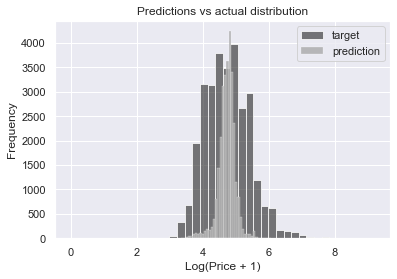

RMSE:  0.6431573996398158


In [119]:
# train error with replace with 0
plot_results(X_train_zero)

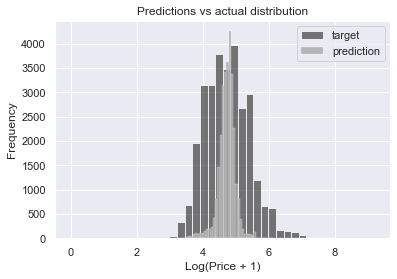

RMSE:  0.642886048486043


In [118]:
# train error with train with mean
plot_results(X_train_mean)

In [120]:
X_val_zero, X_val_mean = prepare_X(df_val)
y_pred_zero = w_0 + X_val_zero.dot(w)
y_pred_mean = w_0 + X_val_mean.dot(w)

In [121]:
rmse(y_val, y_pred_zero)

0.6432865744527931

In [122]:
rmse(y_val, y_pred_mean)

0.6430337788351764

### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

In [123]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [126]:
X_train, _ = prepare_X(df_train)

In [138]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[0], w[7]))

    0, -423.54, 1.31, -5.07
0.001, -378.56, 1.10, -4.58
 0.01, -193.57, 0.21, -2.57
  0.1, -32.88, -0.56, -0.82
    1, -3.53, -0.69, -0.49
   10, -0.35, -0.64, -0.42


In [148]:
X_train, _ = prepare_X(df_train)
X_val, _ = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred), 2))

 1e-06 0.64
0.0001 0.64
 0.001 0.64
  0.01 0.66
   0.1 0.68
     1 0.68
     5 0.68
    10 0.68


In [156]:
X_train, _ = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.0000001)

X_val, _ = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', round(rmse(y_val, y_pred), 2))

X_test, _ = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', round(rmse(y_test, y_pred), 2))

validation: 0.64
test: 0.65


### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))


Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [164]:
def test_seeds(df):
    rmse_scores = []
    
    scores = 0
    
    def prepare_X(df):
        df_num_zero = df[base]
        df_num_mean = df[base]

        # replace with 0
        df_num_zero.reviews_per_month = df_num_zero.reviews_per_month.fillna(0)

        # replace with mean
        replace_col_mean = df_num_mean.reviews_per_month.mean()
        df_num_mean.reviews_per_month = df_num_mean.reviews_per_month.fillna(replace_col_mean)

        X_mean = df_num_mean.values
        X_zero = df_num_zero.values
        return X_mean, X_zero
    
    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w = XTX_inv.dot(X.T).dot(y)

        return w[0], w[1:]


    # get and split data
    for increment_seed in range(9):
        np.random.seed(increment_seed)

        n = len(df)
        n_val = int(0.2 * n)
        n_test = int(0.2 * n)
        n_train = n - (n_val + n_test)
        idx = np.arange(n)
        
        np.random.shuffle(idx)
        df_shuffled = df.iloc[idx]
        
        df_train = df_shuffled.iloc[:n_train].copy()
        df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
        df_test = df_shuffled.iloc[n_train+n_val:].copy()
        
        y_train_orig = df_train.price.values
        y_val_orig = df_val.price.values
        y_test_orig = df_test.price.values

        y_train = np.log1p(df_train.price.values)
        y_val = np.log1p(df_val.price.values)
        y_test = np.log1p(df_test.price.values)

        del df_train['price']
        del df_val['price']
        del df_test['price']

    
        # train
        _, X_train = prepare_X(df_train)
        w_0, w = train_linear_regression(X_train, y_train)

        # collect score
        _, X_val = prepare_X(df_val)
        y_pred = w_0 + X_val.dot(w)
        #print('validation:', rmse(y_val, y_pred))

        _, X_test = prepare_X(df_test)
        y_pred = w_0 + X_test.dot(w)
        #print('test:', rmse(y_test, y_pred))
        
        rmse_scores.append(rmse(y_test, y_pred))
    
    
    # np.std scores
    scores = np.std(rmse_scores)
    
    return scores

In [165]:
test_seeds(df)

0.00785000304393497

### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Train a model with r=0.001.
- What's the RMSE on test dataset?

In [171]:
def train_val_combined(df):
    
    
    def train_linear_regression_reg(X, y, r=0.0):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        reg = r * np.eye(XTX.shape[0])
        XTX = XTX + reg

        XTX_inv = np.linalg.inv(XTX)
        w = XTX_inv.dot(X.T).dot(y)

        return w[0], w[1:]
    
    rmse_test = 0
    
    np.random.seed(9)

    n = len(df)
    n_test = int(0.2 * n)
    n_train = n - (n_test)
    idx = np.arange(n)

    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_test = df_shuffled.iloc[n_train:].copy()

    y_train_orig = df_train.price.values
    y_test_orig = df_test.price.values

    y_train = np.log1p(df_train.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_test['price']

    # train
    _, X_train = prepare_X(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, .001)
    
    
    _, X_test = prepare_X(df_test)
    y_pred = w_0 + X_test.dot(w)
    rmse_test = rmse(y_test, y_pred)
    
    
    return rmse_test

In [172]:
train_val_combined(df)

0.6452771348323516